### Import Libraries

In [1]:
import os
from dotenv import load_dotenv

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
load_dotenv()
# Read the dataset
TRAIN_DATASET_PATH = os.getenv("TRAIN_DATASET_PATH")
TEST_DATASET_PATH = os.getenv("TEST_DATASET_PATH")
PREPROCESSED_DATASET_PATH = os.getenv("PREPROCESSED_DATASET_PATH")
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int64  
 1   Time                  31583 non-null  int64  
 2   Packet Loss Rate      31583 non-null  float64
 3   Packet delay          31583 non-null  int64  
 4   IoT                   31583 non-null  int64  
 5   LTE/5G                31583 non-null  int64  
 6   GBR                   31583 non-null  int64  
 7   Non-GBR               31583 non-null  int64  
 8   AR/VR/Gaming          31583 non-null  int64  
 9   Healthcare            31583 non-null  int64  
 10  Industry 4.0          31583 non-null  int64  
 11  IoT Devices           31583 non-null  int64  
 12  Public Safety         31583 non-null  int64  
 13  Smart City & Home     31583 non-null  int64  
 14  Smart Transportation  31583 non-null  int64  
 15  Smartphone         

In [4]:
df_train.describe()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
count,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000
mean,10.974923,11.476459,0.003079,114.126745,0.468100,0.531900,0.441187,0.558813,0.106291,0.057943,0.116107,0.057879,0.059716,0.117722,0.058734,0.425609,1.702150
std,6.053641,6.915643,0.004344,106.320976,0.498989,0.498989,0.496537,0.496537,0.308215,0.233639,0.320358,0.233519,0.236963,0.322283,0.235130,0.494443,0.822956
min,1.000000,0.000000,0.000001,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,6.000000,0.000001,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11.000000,11.000000,0.001000,75.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,16.000000,17.000000,0.010000,150.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,22.000000,23.000000,0.010000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df_train.head(5)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


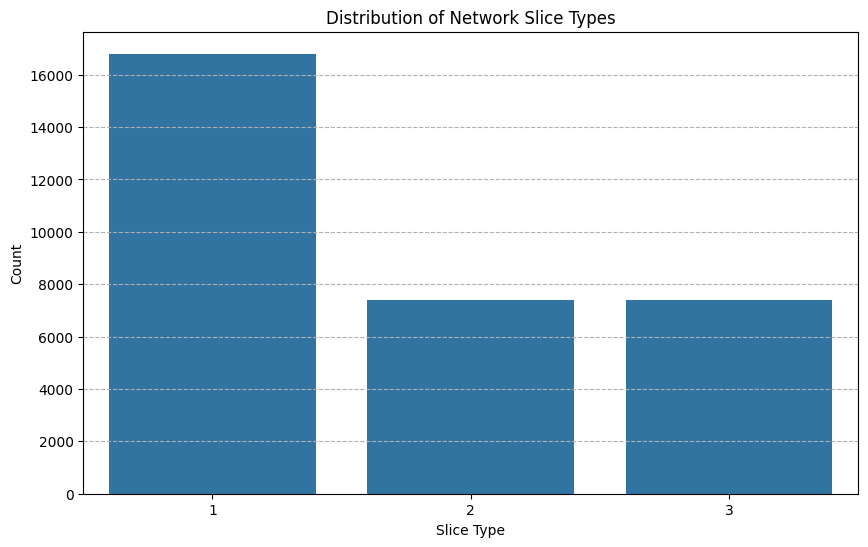

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slice Type', data=df_train)
plt.title('Distribution of Network Slice Types')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

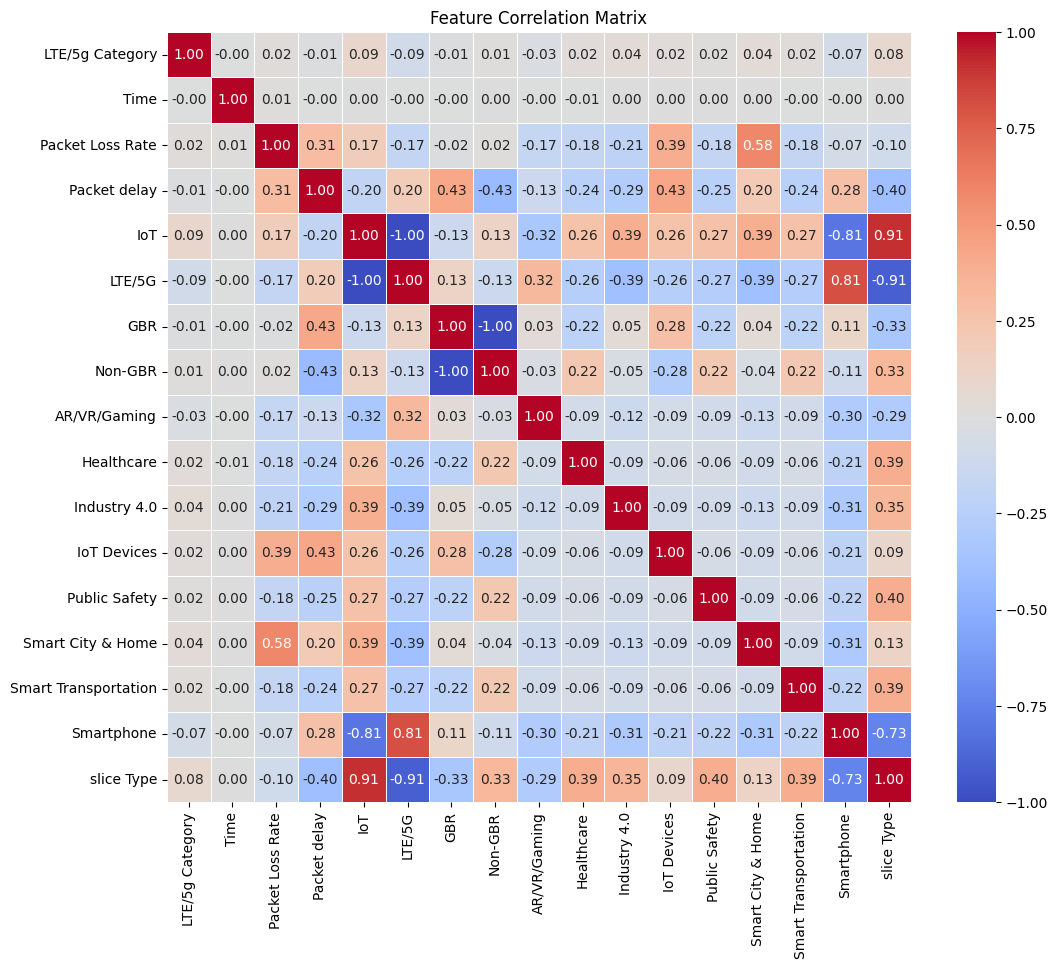

In [7]:
# Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

### Feature Correlation Insights

An analysis of the feature correlation matrix provides critical insights into the structure of the dataset. This informs our feature engineering strategy and sets expectations for model performance. The key deductions are outlined below.

#### 1. Strong Predictive Features for Slice Type

The correlation matrix reveals several features that are highly predictive of the target variable, `slice Type`. This is a strong indicator that a machine learning model will be highly effective in classifying network slices.

- **`IoT` vs. `slice Type` (Correlation: +0.91):** This extremely strong positive correlation suggests that traffic from an `IoT` source almost perfectly maps to a specific slice type. In 5G terminology, `IoT` is the primary driver for the **mMTC (Massive Machine-Type Communications)** slice. We can therefore deduce that the mMTC slice is represented by a high-value number in the `slice Type` column.

- **`LTE/5G` vs. `slice Type` (Correlation: -0.91):** This strong negative correlation indicates that when a device is marked as `LTE/5G` capable, it consistently maps to a slice type with a low numerical value. This feature signifies a need for high bandwidth, which is the defining characteristic of the **eMBB (Enhanced Mobile Broadband)** slice.

- **`Smartphone` vs. `slice Type` (Correlation: -0.73):** This reinforces the deduction above. Smartphones are a classic use case for the eMBB slice, and this feature's strong negative correlation further confirms that the eMBB slice is represented by a low number.

#### 2. Critical Insight: Multicollinearity and Redundant Features

The analysis exposes perfect multicollinearity between certain feature pairs. This is a crucial finding that must be addressed during preprocessing to prevent issues with model training.

- **`IoT` vs. `LTE/5G` (-1.00)**
- **`GBR` vs. `Non-GBR` (-1.00)**

These features are perfectly mutually exclusive (e.g., if `IoT` is 1, `LTE/5G` is always 0). Including both features from each pair in a model is redundant and adds no new information.

#### 3. Other Domain-Specific Relationships

The matrix also highlights other interesting relationships that reflect real-world network behavior:

- **`Smart City & Home` vs. `Packet Loss Rate` (+0.58):** This suggests that smart city applications in this dataset have a higher tolerance for packet loss, which is typical for non-critical sensor networks.

- **`Packet Loss Rate` vs. `Packet delay` (+0.31):** This correlation illustrates a classic networking principle where network congestion leads to both higher latency and an increase in dropped packets.

### PREPROCESSING

In [8]:
def calculate_qos_violation(row):
    '''
    This feature creates a "violation score" based on 
    standard 5G service requirements. It directly measures 
    if the network is failing to meet the SLA for a given traffic type.
    '''
    score = 0
    # Rule for URLLC-like traffic 
    if row['Packet delay'] < 50: 
        if row['Packet delay'] > 10: score += 1 # High severity
        if row['Packet Loss Rate'] > 0.001: score += 1
    # Rule for eMBB-like traffic
    else:
        if row['Packet delay'] > 151: score += 1
        if row['Packet Loss Rate'] > 0.01: score += 1
    return score

df_train['QoS_Violation_Score'] = df_train.apply(calculate_qos_violation, axis=1)
df_test['QoS_Violation_Score'] = df_test.apply(calculate_qos_violation, axis=1)

# This feature indicates whether the SLA is violated (1) or not (0).
df_train['Will_Violate_SLA'] = df_train['QoS_Violation_Score'].apply(lambda x: 1 if x > 0 else 0)
df_test['Will_Violate_SLA'] = df_test['QoS_Violation_Score'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
# Feature that estimates how "heavy" a user session is on network resources.
df_train['Session_Intensity'] = df_train['LTE/5g Category'] * df_train['GBR']
df_test['Session_Intensity'] = df_test['LTE/5g Category'] * df_test['GBR']

In [10]:
# Service Criticality Feature
critical_services = ['Healthcare', 'Industry 4.0', 'Public Safety']
df_train['Is_Critical_Service'] = df_train[critical_services].any(axis=1).astype(int)
df_test['Is_Critical_Service'] = df_test[critical_services].any(axis=1).astype(int)

In [11]:
# Save preprocessed dataset
df_train.head(5)
df_train.to_csv(PREPROCESSED_DATASET_PATH)

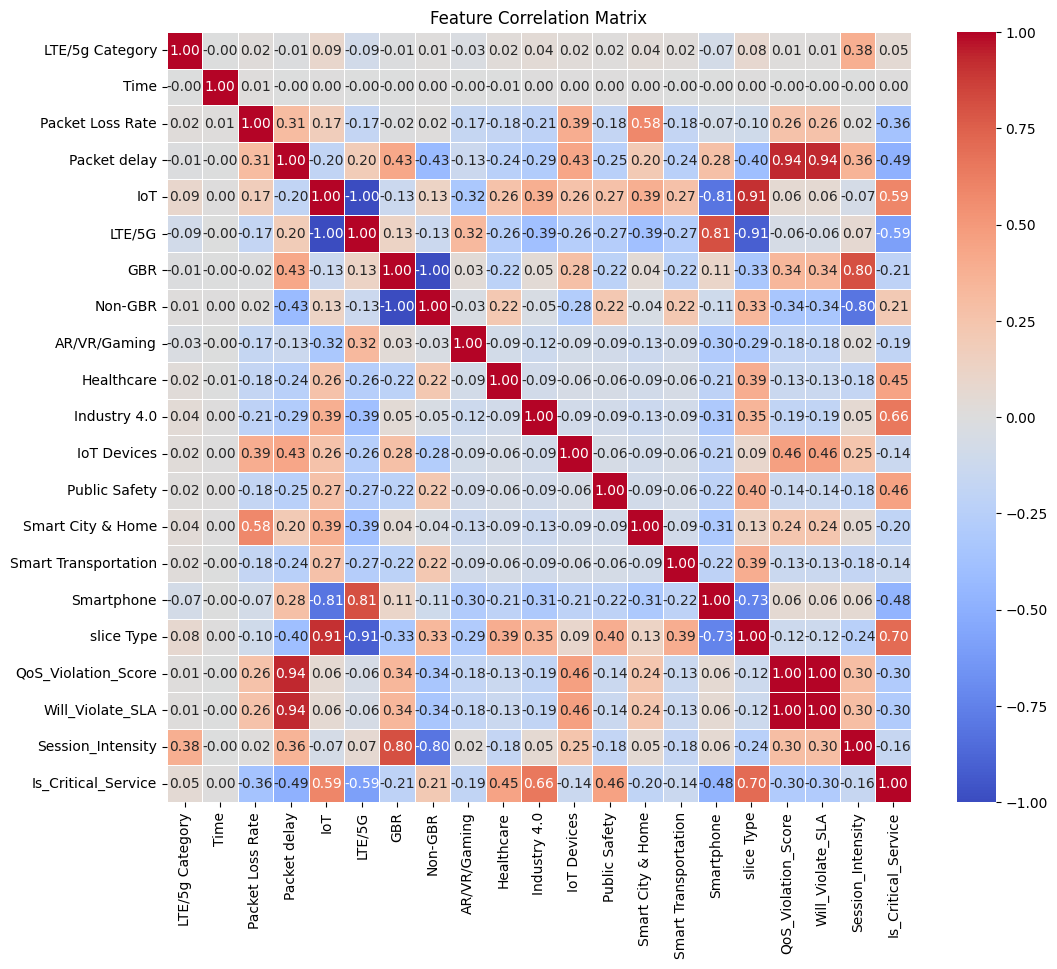

In [12]:
# Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

### `Packet delay` is the best correlation with `Will_Violate_SLA`

- **Correlation (`Packet delay` vs. `Will_Violate_SLA`): +0.94**

This extremely strong positive correlation is the most significant finding. It tells us, unequivocally, that **`Packet delay` is the dominant driver of SLA violations** in this dataset. As delay increases, the probability of a violation approaches certainty. For our machine learning model, this means `Packet delay` will be the most influential predictive feature.

### Sanity Check: Confirming Our Ground Truth

- **Correlation (`QoS_Violation_Score` vs. `Will_Violate_SLA`): +1.00**

This perfect correlation is not a discovery but a confirmation. It validates that our target variable, `Will_Violate_SLA`, was correctly created from the `QoS_Violation_Score`.

The most interesting story comes from the features we built:

- **Correlation (`Session_Intensity` vs. `Will_Violate_SLA`): -0.30**
- **Correlation (`Is_Critical_Service` vs. `Will_Violate_SLA`): -0.30**

These moderate **negative** correlations are highly insightful. They indicate that sessions with higher intensity (i.e., "heavy hitters") and those flagged as critical services are **less likely** to experience an SLA violation. This suggests the underlying network is successfully **prioritizing important traffic**, protecting its most valuable services from performance degradation. Our feature engineering has successfully captured this hidden operational logic.

### TRAINING

We will predict violation on SLA. Why it is critical? When the model predicts Will_Violate_SLA = 1 for an incoming session, the network orchestrator can automatically:

- Allocate more resources.

- Route the traffic through a less congested part of the core network.

- Reserve a dedicated GBR bearer if it wasn't already requested.

--- Classification Report ---
                  precision    recall  f1-score   support

SLA Not Violated       1.00      1.00      1.00     24522
    SLA Violated       1.00      1.00      1.00      7062

        accuracy                           1.00     31584
       macro avg       1.00      1.00      1.00     31584
    weighted avg       1.00      1.00      1.00     31584


--- Confusion Matrix ---


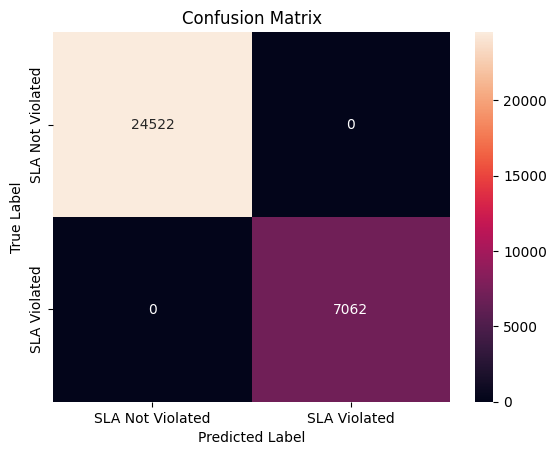

In [13]:
X_train = df_train.drop(['Will_Violate_SLA', 'slice Type'], axis=1)
y_train = df_train['Will_Violate_SLA']

X_test = df_test.drop('Will_Violate_SLA', axis=1)
y_test = df_test['Will_Violate_SLA']

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

# Model Evaluation
predictions = model.predict(X_test_scaled)

class_labels = ['SLA Not Violated', 'SLA Violated']

print("--- Classification Report ---")
print(classification_report(y_test, predictions, labels=[0, 1], target_names=class_labels))

print("\n--- Confusion Matrix ---")
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()